## TP 2

## A partir du jeu de données original, créer:


un Dataframe comportant tous les modules en précisant l’effectif des apprenants, le nombre total de sessions, le score maximal, le score minimal, le taux de réussite (pour les apprenants des scores > 50)
un tableau 2D Numpy avec les données des 10 tops modules selon les taux 


In [1]:
import pandas as pd
import numpy as np

In [2]:
fiche = pd.read_csv("C:/Users/user/Desktop/Doc Professionnel/ODC/scorm_tracking_copy.csv", sep=';')

In [3]:
print('La liste complete est : \n')
fiche.head(10)

La liste complete est : 



,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
5,7,dtic@mobiletic.com,session-60,688-genolier-foundation,lesson,1.0,100.0,24766.0,3,25/08/2016 17:31,27/10/2017 14:50,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
6,9,dtic@mobiletic.com,session-94,689-rh-prevoyance-et-evaluation,lesson,1.0,0.0,21837.0,7,25/08/2016 17:34,02/11/2017 15:55,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
7,10,ga2018_umbe@yopmail.com,session-109,696-strategie-und-wachstum,lesson,1.0,100.0,272.0,6,25/08/2016 17:34,29/08/2016 09:45,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
8,11,ga2018_uufe@yopmail.com,session-122,703-ausbildung,lesson,1.0,0.0,308.0,5,25/08/2016 18:08,06/09/2016 18:31,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
9,12,ga2018_uufe@yopmail.com,session-128,702-personal-vorsorge-und-mitarbeiterbeurteilung,lesson,1.0,100.0,1632.0,7,25/08/2016 18:17,06/09/2016 19:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0


In [4]:
fi = fiche[['object_id','actor','session_uuid','score', 'temps']]
#fi

In [5]:
effM = fi.groupby(['object_id']).actor.nunique()
#effM

In [6]:
ScoreMax = fi.groupby(['object_id']).score.max()

In [7]:
ScoreMin = fi.groupby(['object_id']).score.min()
nbSession = fi.groupby(['object_id']).session_uuid.nunique()
temps = fi.groupby(['object_id']).temps.sum()

In [8]:
f = pd.DataFrame(effM)
#f

In [9]:
f['ScoreMax'] = ScoreMax
f['ScoreMin'] = ScoreMin
f['nb_Session'] = nbSession
f['temps'] = temps
#f

In [10]:
passant = fi[fi['score'] >= 50]

In [11]:
admis = passant.groupby(['object_id','actor']).score.max()
#admis

In [12]:
nbAdmis = admis.groupby(['object_id']).count()
#nbAdmis
#admis.reset_index()

In [13]:
f['Admis'] = nbAdmis 
f.head(10)

,actor,ScoreMax,ScoreMin,nb_Session,temps,Admis
object_id,,,,,,
632-le-hibou-grand-duc,1,0.0,0.0,1,0.0,NaN
669-vallee-trient-finhaut-source-de-bien-etre,1,0.0,0.0,1,5.0,NaN
671-presentation,340,100.0,0.0,634,464961.0,308.0
674-strategie-et-croissance,327,100.0,0.0,471,233362.0,298.0
677-affaires-medicales,322,100.0,0.0,469,276037.0,295.0
678-politique-et-cadre-legal,327,100.0,0.0,602,267854.0,247.0
681-corporate-marketing-et-communication,250,100.0,0.0,318,113448.0,235.0
681-ergonomie-de-l-environnement,2,0.0,0.0,2,0.0,NaN
682-les-services-aux-patients,250,100.0,0.0,343,149609.0,207.0


In [14]:
f['Admis'] = f['Admis'].fillna(0)

In [15]:
f['Taux de reussite'] = (f['Admis']/f['actor'])*100
f

,actor,ScoreMax,ScoreMin,nb_Session,temps,Admis,Taux de reussite
object_id,,,,,,,
632-le-hibou-grand-duc,1,0.0,0.0,1,0.0,0.0,0.000000
669-vallee-trient-finhaut-source-de-bien-etre,1,0.0,0.0,1,5.0,0.0,0.000000
671-presentation,340,100.0,0.0,634,464961.0,308.0,90.588235
674-strategie-et-croissance,327,100.0,0.0,471,233362.0,298.0,91.131498
677-affaires-medicales,322,100.0,0.0,469,276037.0,295.0,91.614907
...,...,...,...,...,...,...,...
824-nescens,12,0.0,0.0,22,4979.0,0.0,0.000000
825-die-dienstleistungen-f-r-den-patienten,61,100.0,0.0,156,45404.0,56.0,91.803279
826-i-servizi-ai-pazienti,12,100.0,0.0,35,9937.0,10.0,83.333333


In [16]:
fAdmis = f.sort_values(by = (['Taux de reussite']), ascending = False)
#fAdmis

In [17]:
Top = fAdmis.head(10)
#Top 

un tableau 2D Numpy avec les données des 10 tops modules selon les taux de réussites (Chaque ligne représente un module)

In [18]:
tab = np.array([Top])
#tab

## Pour le top module et le dernier:


créer un Dataframe avec les données résumées de chaque apprenants: nombre total de sessions, nombre total de temps, score, resultat final (de valeur 0 si score < 50 et 1 sinon)


In [19]:
fiche = pd.read_csv("C:/Users/user/Desktop/Doc Professionnel/ODC/scorm_tracking_copy.csv", sep=';')

### Pour le 1er top module

In [20]:
topp = fAdmis.iloc[0:10,:]
d = topp.reset_index()
#d

In [21]:
fich = fiche[['object_id','actor','session_uuid','score','temps']]
infTop = fich.loc[(fich['object_id'] == fAdmis.index[0]),:]
#infTop

In [22]:
#list(fAdmis.index)

In [23]:
Session = infTop.groupby(['object_id','actor']).session_uuid.count()
TimeTotal = infTop.groupby(['object_id','actor']).temps.sum()
ScoreTotal = infTop.groupby(['object_id','actor']).score.max()

In [24]:
resume = pd.DataFrame({'Sessions':Session})
resume['TimeTotal'] = TimeTotal
resume['ScoreTotal'] = ScoreTotal
resume['Admis'] = 0
resume.loc[resume['ScoreTotal'] >= 50, 'Admis'] = 1


In [25]:
resume.head(60)

Sessions  TimeTotal  \
object_id                      actor                                          
752-etudes-de-cas-et-questions dtic@mobiletic.com              4     1546.0   
                               ga2018_05n7@yopmail.com         1      425.0   
                               ga2018_096a@yopmail.com         4      481.0   
                               ga2018_0buu@yopmail.com         1      236.0   
                               ga2018_0hot@yopmail.com         1      449.0   
                               ga2018_0jap@yopmail.com         1      532.0   
                               ga2018_0kf4@yopmail.com         1      401.0   
                               ga2018_0yno@yopmail.com         1      183.0   
                               ga2018_1828@yopmail.com         1      657.0   
                               ga2018_19im@yopmail.com         1      202.0   
                               ga2018_1hvo@yopmail.com         1      529.0   
                               ga2018_1ywo@yopmail.com         3      392.0   
                               ga2018_2jjx@yopmail.com         3      816.0   
                               ga2018_2kh7@yopmail.com         2      187.0   
                               ga2018_2lf3@yopmail.com         1      246.0   
                               ga2018_2s9e@yopmail.com         3      338.0   
                               ga2018_3dcp@yopmail.com         3      703.0   
                               ga2018_3gg4@yopmail.com         3      195.0   
                               ga2018_3qo2@yopmail.com         3      301.0   
                               ga2018_41ja@yopmail.com         2      387.0   
                               ga2018_48o0@yopmail.com         3      383.0   
                               ga2018_4sca@yopmail.com         1      246.0   
                               ga2018_5t9t@yopmail.com         1      316.0   
                               ga2018_6d3t@yopmail.com         1      159.0   
                               ga2018_6tje@yopmail.com         1     1347.0   
                               ga2018_6uss@yopmail.com         1      434.0   
                               ga2018_70fi@yopmail.com         3      434.0   
                               ga2018_74mv@yopmail.com         1      485.0   
                               ga2018_7q2y@yopmail.com         1      130.0   
                               ga2018_86hs@yopmail.com         3      263.0   
                               ga2018_8ywr@yopmail.com         2      349.0   
                               ga2018_93bd@yopmail.com         1      317.0   
                               ga2018_9ar1@yopmail.com         1      365.0   
                               ga2018_9bci@yopmail.com         2      912.0   
                               ga2018_9jez@yopmail.com         1      471.0   
                               ga2018_9nwc@yopmail.com         1      530.0   
                               ga2018_9ydp@yopmail.com         1      458.0   
                               ga2018_a9i7@yopmail.com         1      258.0   
                               ga2018_afc8@yopmail.com         2      310.0   
                               ga2018_akqr@yopmail.com         3      540.0   
                               ga2018_amc9@yopmail.com         4      506.0   
                               ga2018_ay6r@yopmail.com         2      390.0   
                               ga2018_b004@yopmail.com         1      611.0   
                               ga2018_bhov@yopmail.com         1      519.0   
                               ga2018_c3cn@yopmail.com         1      468.0   
                               ga2018_ceg4@yopmail.com         1      545.0   
                               ga2018_cy0b@yopmail.com         2      340.0   
                               ga2018_dbf5@yopmail.com         1      278.0   
                               ga2018_dsu6@yopmail.com         8      181.0   
                           

### Pour le top dernier

In [26]:
fich1 = fiche[['object_id','actor','session_uuid','score','temps']]

In [27]:
a = fAdmis.index[-1]

In [28]:
infTopD = fich1.loc[fiche['object_id'] == a]
#infTopD

In [29]:
Session = infTopD.groupby(['object_id','actor']).session_uuid.count()
TimeTotal = infTopD.groupby(['object_id','actor']).temps.sum()
ScoreTotal = infTopD.groupby(['object_id','actor']).score.max()

In [30]:
resume1 = pd.DataFrame({'Sessions':Session})
resume1['TimeTotal'] = TimeTotal
resume1['ScoreTotal'] = ScoreTotal
resume1['Admis'] = 1
resume1.loc[resume1['ScoreTotal'] < 50, 'Admis'] = 0

In [31]:
resume1

,,Sessions,TimeTotal,ScoreTotal,Admis
object_id,actor,,,,
632-le-hibou-grand-duc,alexandre.comby@mobiletic.com,1,0.0,0.0,0


## Un clin d'oeil à Matplotlib

### Pour les 10 top module:

représenter par une courbe ces derniers dans un même repère sur une figure unique. A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. L’ordonné est déterminé par son score maximum.


In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
TimeTotalfig = infTop.groupby(['actor']).temps.sum()
ScoreTotalfig = infTop.groupby(['actor']).score.max()
fig = pd.DataFrame({})
fig['TimeTotal'] = TimeTotalfig
fig['ScoreTotal'] = ScoreTotalfig
(fig['TimeTotal'])/60

actor
dtic@mobiletic.com         25.766667
ga2018_05n7@yopmail.com     7.083333
ga2018_096a@yopmail.com     8.016667
ga2018_0buu@yopmail.com     3.933333
ga2018_0hot@yopmail.com     7.483333
                             ...    
ga2018_xovt@yopmail.com     5.266667
ga2018_xsog@yopmail.com     6.333333
ga2018_yap3@yopmail.com    11.433333
ga2018_yfb1@yopmail.com     5.033333
ga2018_zs6b@yopmail.com     3.800000
Name: TimeTotal, Length: 123, dtype: float64

In [34]:
figure = fig.sort_values(by = (['TimeTotal']), ascending = True)

In [35]:
#figure

In [36]:
def get_module_data(all_module, one_module_name):
    one_module_data = all_module[all_module["object_id"]== one_module_name]
    TimeTotalfig = one_module_data.groupby(['actor']).temps.sum()
    ScoreTotalfig = one_module_data.groupby(['actor']).score.max()
    fig = pd.DataFrame({})
    fig['TimeTotal'] = TimeTotalfig/60
    fig['ScoreTotal'] = ScoreTotalfig
    fig.sort_values(by = 'TimeTotal', inplace = True)
    return fig
    
def display_modules(all_module, top10_modules):
    fig, ax = plt.subplots(figsize= (10, 4), layout='constrained')
    for mdl_name in top10_modules:
        figure = get_module_data(all_module, mdl_name)
        ax.plot(figure['TimeTotal'], figure['ScoreTotal'], label = mdl_name)
    ax.set_xlabel('TimeTotal')
    ax.set_ylabel('ScoreTotal')
    ax.set_title('Representation du score en fonction du temps')
    ax.legend()
    
    

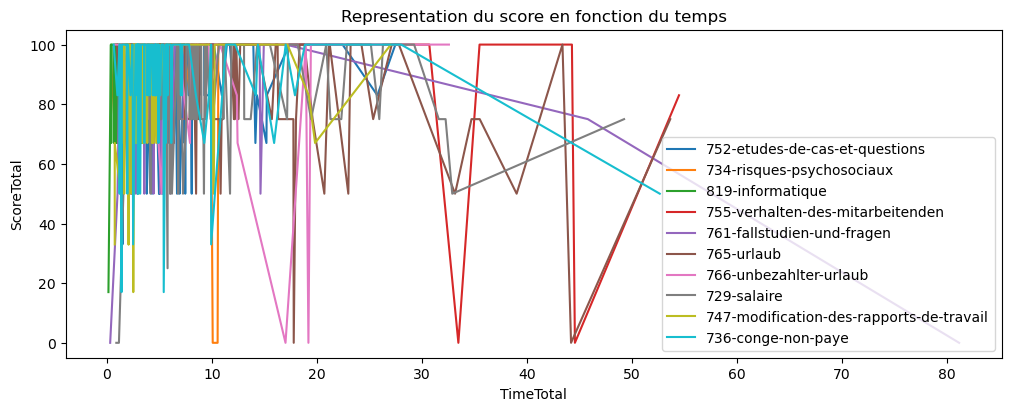

In [37]:
toplist = fAdmis.index[:10]
display_modules(fich,toplist)

Un diagramme en bâton avec le taux de réussite de chaque module. 

In [38]:
def diagram(fAdmis):
    fig, ax = plt.subplots(figsize=(15, 7), layout='constrained')
    f = fAdmis["Taux de reussite"].head(10).values
    categorie = fAdmis.index[:10]
    plt.xticks(rotation = "-70")
    ax.bar(categorie, f);
    

In [39]:
f = fAdmis["Taux de reussite"].head(10).values
f

array([99.18699187, 98.38709677, 98.30508475, 97.87234043, 97.75280899,
       97.72727273, 97.72727273, 97.6744186 , 97.58064516, 96.72131148])

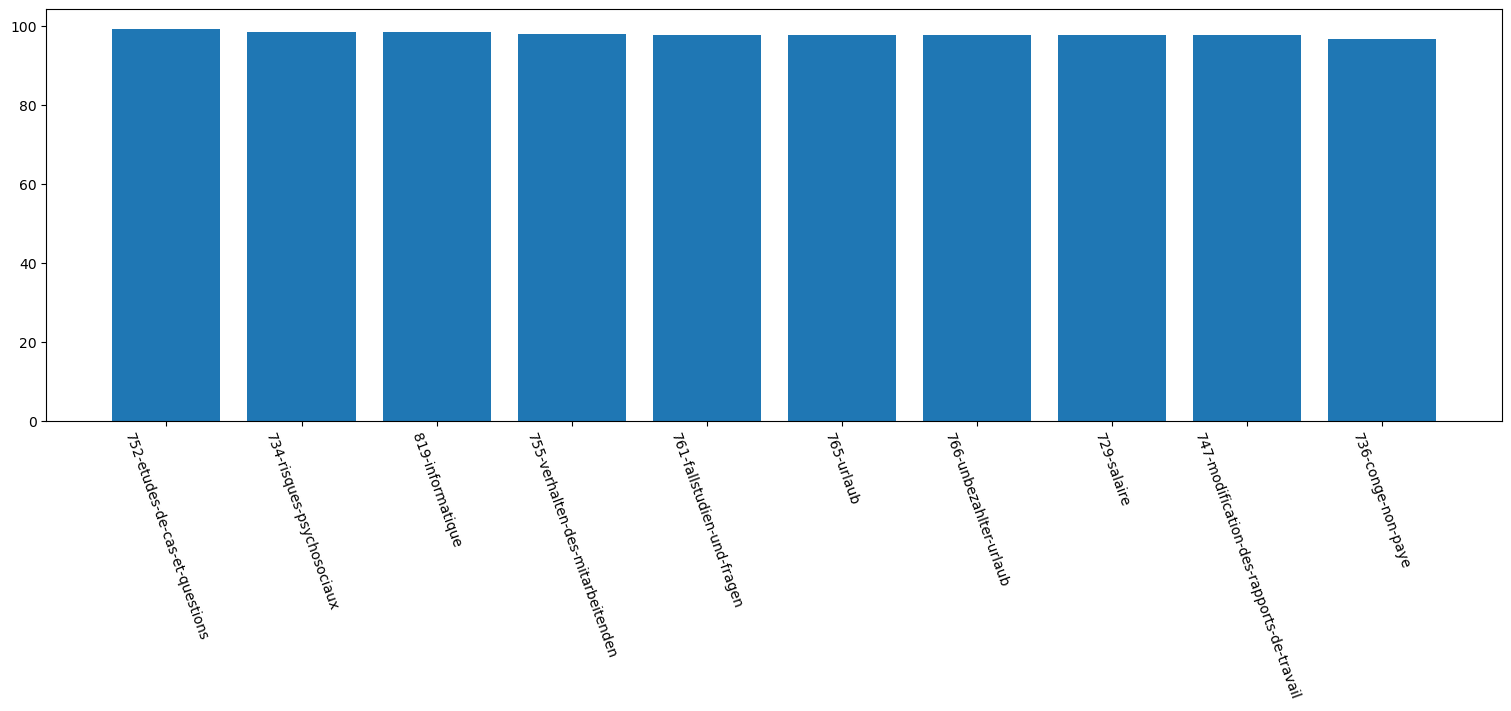

In [40]:
diagram(fAdmis)

### Pour les 3 top module:

représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par son score maximum.

In [41]:
def presentationTop3() :
    for i in toplist:
        va= fiche.loc[fiche["object_id"]==i,:].groupby("actor")
        return va
        

In [42]:
def top3Graphique():
    fig, ax = plt.subplots(3, 1, sharex=True)
    fig.subplots_adjust(hspace=0)
    k =0
    for i in toplist[:3]:
        donnee = fiche.loc[fiche["object_id"]==i,:].groupby("actor")
        dd = pd.DataFrame({"score": donnee.score.max().sort_values(ascending = False)})
        dd.insert(0, "Rang", range(1, 1+len(donnee)))
        ax[k].plot(dd["Rang"], dd["score"])
        k+=1

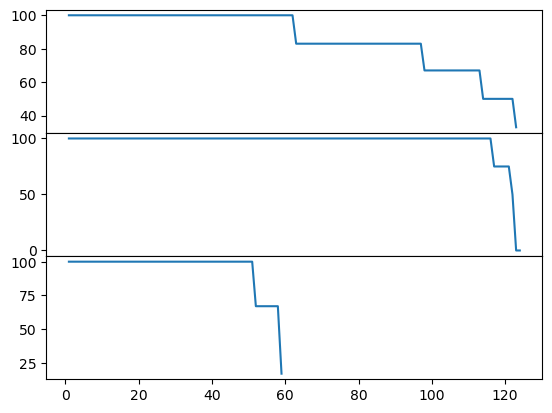

In [43]:
top3Graphique()

## Pour tous les modules:

représenter l’ensemble par un nuage de points dans un même repère sur une même figure. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.

In [44]:
datascore = fich.groupby(['object_id','actor']).score.max()
datatemps = fich.groupby(['object_id','actor']).temps.sum()/60
data = pd.DataFrame({"score": datascore, "temps": datatemps})
data.sort_values(by = 'score',ascending = False, inplace = True)
data["Rang"] = list(range(1, len(data["score"])+ 1))
data

score      temps   Rang
object_id                  actor                                           
696-strategie-und-wachstum ga2018_nex8@yopmail.com  100.0  17.433333      1
701-informatik             ga2018_s9i9@yopmail.com  100.0   1.616667      2
                           ga2018_s3wo@yopmail.com  100.0   3.666667      3
                           ga2018_rppc@yopmail.com  100.0   0.683333      4
                           ga2018_r8wt@yopmail.com  100.0   1.783333      5
...                                                   ...        ...    ...
724-but-du-module          ga2018_p8cd@yopmail.com    0.0   0.700000  15409
                           ga2018_oyvp@yopmail.com    0.0   0.266667  15410
                           ga2018_oqzx@yopmail.com    0.0   0.850000  15411
                           ga2018_nv24@yopmail.com    0.0   0.400000  15412
720-network-entwicklung    RWidtmann@gsmn.ch          0.0   0.000000  15413

[15413 rows x 3 columns]

In [45]:

data1 =data.reset_index()
data1 = data1.set_index('object_id')

In [46]:
data1

,actor,score,temps,Rang
object_id,,,,
696-strategie-und-wachstum,ga2018_nex8@yopmail.com,100.0,17.433333,1
701-informatik,ga2018_s9i9@yopmail.com,100.0,1.616667,2
701-informatik,ga2018_s3wo@yopmail.com,100.0,3.666667,3
701-informatik,ga2018_rppc@yopmail.com,100.0,0.683333,4
701-informatik,ga2018_r8wt@yopmail.com,100.0,1.783333,5
...,...,...,...,...
724-but-du-module,ga2018_p8cd@yopmail.com,0.0,0.700000,15409
724-but-du-module,ga2018_oyvp@yopmail.com,0.0,0.266667,15410
724-but-du-module,ga2018_oqzx@yopmail.com,0.0,0.850000,15411


In [47]:
ind = list(data1.index)
#ind

In [50]:
def topNuage(data,ind):
    fig, ax = plt.subplots(figsize=(7, 3), layout = "constrained")
    #fig.subplots_adjust(hspace=0)
    for i in ind: 
        datascore = fich.groupby(['object_id','actor']).score.max()
        datatemps = fich.groupby(['object_id','actor']).temps.sum()/60
        data = pd.DataFrame({"score": datascore, "temps": datatemps})
        data.sort_values(by = 'score',ascending = False, inplace = True)
        data["Rang"] = list(range(1, len(data["score"])+ 1))
        ax.scatter(data["Rang"], data["temps"], label=i)
        ax.set_xlabel("Rang")
        ax.set_ylabel("temps")
    #ax.set_title("Nuage pour" +str(i+1)+"top modules")
    ax.legend()
    #return dd

In [ ]:
topNuage(data1,ind)

MemoryError: 

<Figure size 700x300 with 1 Axes>

Un camembert avec le taux des modules catégorisés en quatre classes: 
Classe A: taux de réussite > = 80%
Classe B: taux de réussite > = 60%
Classe C: taux de réussite > = 50%
Classe D: taux de réussite < 50%


In [ ]:
def classification(f):
    print(f['Taux de reussite'])
    if f['Taux de reussite'] >= 80:
        f['classe'] = 'classe A'
    elif f['Taux de reussite'] >= 60:
        f['classe'] = 'classe B'
    elif f['Taux de reussite'] >= 50:
        f['classe'] = 'classe C'
    else:
        f['classe'] = 'classe D'
    categorie = f.groupby('classe').classe.count()
    plt.figure(figsize = (7, 3), layout = 'constrained')
    plt.pie(categorie.values, labels=categorie.f.values, autopct = '%1.1f%%')
                

In [ ]:
classification(l)